In [1]:
## This file is part of Jax Geometry
#
# Copyright (C) 2021, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/jaxgeometry
#
# Jax Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.|
#
# Jax Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Jax Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# LDDMM landmark dynamics

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from jaxgeometry.manifolds.landmarks import *
M = landmarks(6)
print(M)
from jaxgeometry.plotting import *

6 landmarks in R^2 (dim 12). kernel Gaussian, k_alpha=1, k_sigma=[[1. 0.]
 [0. 1.]], standard_basis=True, cfg kernel codim=0, order (if Sobolev)=2


In [4]:
# Riemannian structure
from jaxgeometry.Riemannian import metric
metric.initialize(M)

In [5]:
# example configuration
M.k_sigma = jnp.diag(jnp.array([.5,.5]))

q = M.coords(jnp.vstack((np.linspace(-.5,.5,M.N),np.zeros(M.N))).T.flatten())
# if M.std_basis:
v = jnp.array(jnp.vstack((np.zeros(M.N),np.ones(M.N))).T.flatten())
p = M.flat(q,v)
# else:
#     q = 
#     p = .5*jnp.vstack((jnp.ones((M.codim//M.m,M.m)),np.zeros(((M.dim-M.codim)//M.m,M.m)))).flatten()
#     v = M.sharp(q,p)
print("q = ", q)
print("v = ", v)
print("p = ", p)

q =  (Array([-0.5,  0. , -0.3,  0. , -0.1,  0. ,  0.1,  0. ,  0.3,  0. ,  0.5,
        0. ], dtype=float32), Array([0.], dtype=float32))
v =  [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
p =  [   0.    24.     0.   -60.     0.   -16.     0.   168.     0.  -168.
    0.    55.5]


## Geodesics

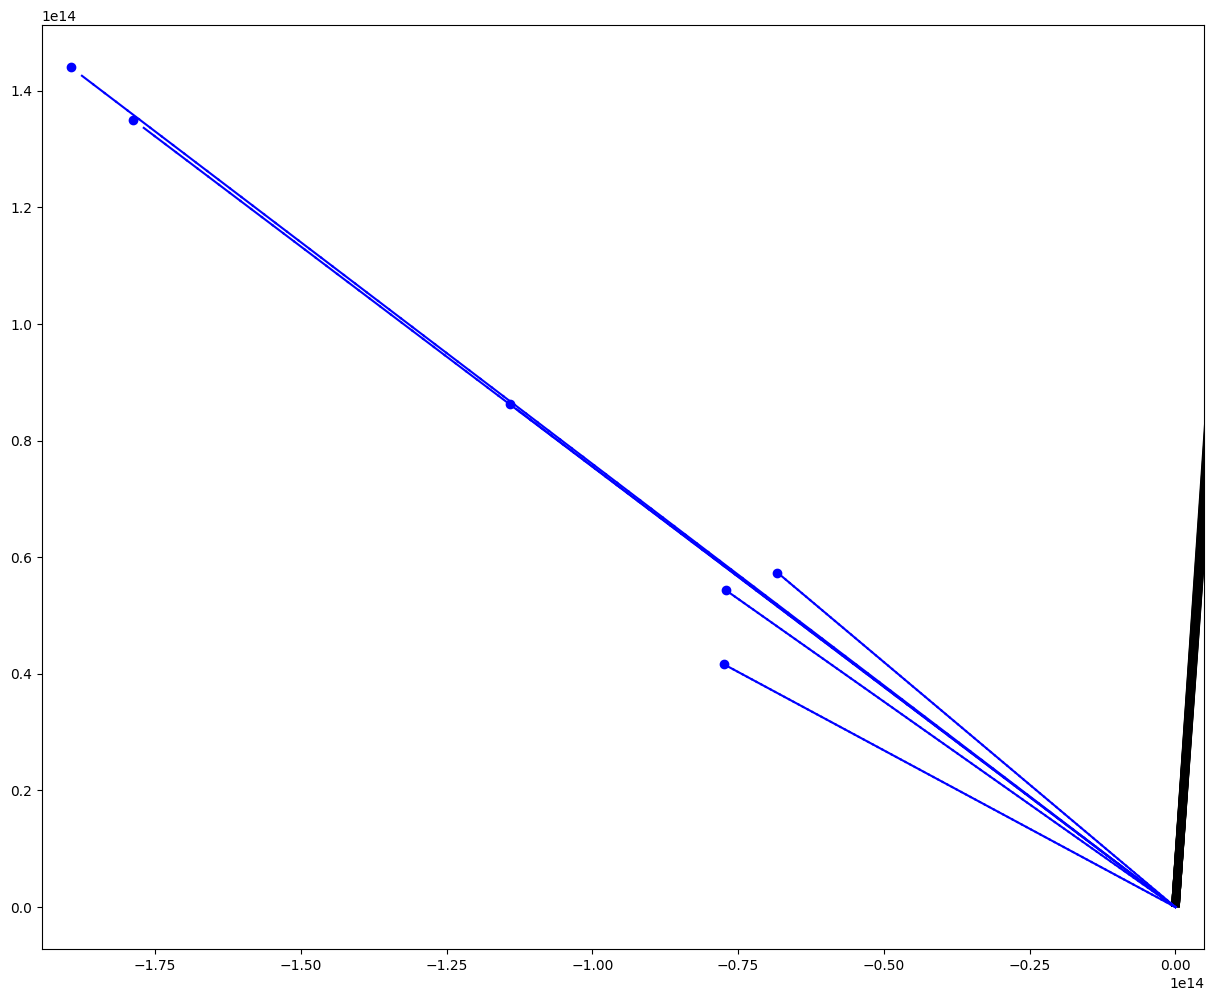

In [6]:
# 2nd order geodesic equation
from jaxgeometry.Riemannian import geodesic
geodesic.initialize(M)

p = jnp.array(jnp.vstack((np.zeros(M.N),np.ones(M.N))).T.flatten()+.2*np.random.rand(M.N*M.m))
v = M.sharp(q,p)

(qs,charts) = M.Expt(q,v)
M.plot()
M.plot_path(zip(qs,charts),v,linewidth=1.5)
plt.show()

21.080126


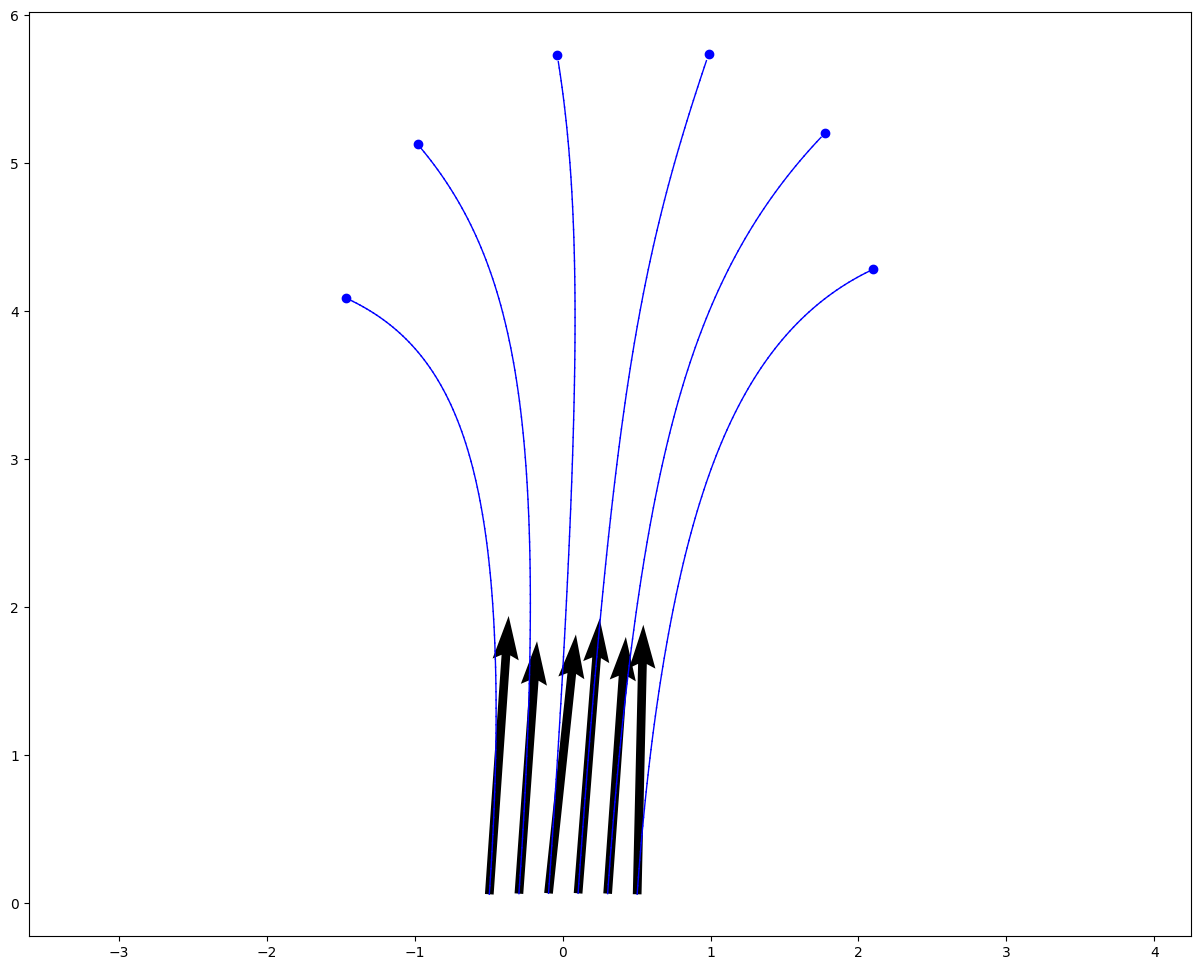

Energy:  [21.08072  21.081314 21.081915 21.082514 21.083118 21.083727 21.084341
 21.084967 21.085596 21.08624  21.086897 21.087564 21.08825  21.088945
 21.08966  21.090393 21.091146 21.091919 21.092714 21.09353  21.094376
 21.09524  21.09613  21.097052 21.097996 21.09897  21.099977 21.101017
 21.102083 21.103182 21.104319 21.105484 21.106684 21.107918 21.109188
 21.110487 21.111826 21.113197 21.114605 21.116045 21.117517 21.11902
 21.120556 21.122122 21.123718 21.125341 21.126991 21.128662 21.130358
 21.13207  21.1338   21.135548 21.137306 21.139072 21.140844 21.14262
 21.14439  21.14616  21.147917 21.149668 21.151398 21.153109 21.154799
 21.156462 21.158094 21.159697 21.161264 21.16279  21.164278 21.165724
 21.16713  21.168484 21.169798 21.171066 21.172289 21.173468 21.174604
 21.175697 21.17675  21.177765 21.178745 21.179699 21.180618 21.181513
 21.18238  21.183233 21.184065 21.184889 21.185696 21.186499 21.187296
 21.188091 21.188885 21.18968  21.19048  21.19128  21.192093 21.192907

In [7]:
# Hamiltonian dynamics
from jaxgeometry.dynamics import Hamiltonian
Hamiltonian.initialize(M)

print(M.H(q,p))

# geodesic
(qs,charts) = M.Exp_Hamiltoniant(q,p)

M.plot()
M.plot_path(zip(qs,charts),p)
plt.show()

# dynamics returning both position and momentum
(ts,qps,_) = M.Hamiltonian_dynamics(q,p,dts())
ps = qps[:,1,:]
print("Energy: ",np.array([M.H((q,chart),p) for (q,p,chart) in zip(qs,ps,charts)]))

## Boundary value problem

[0.06692548 1.1945665  0.10868423 1.0875853  0.10824476 1.1181152
 0.08884203 1.1667129  0.05834264 1.1296079  0.04515076 1.1435388 ]
21.080126


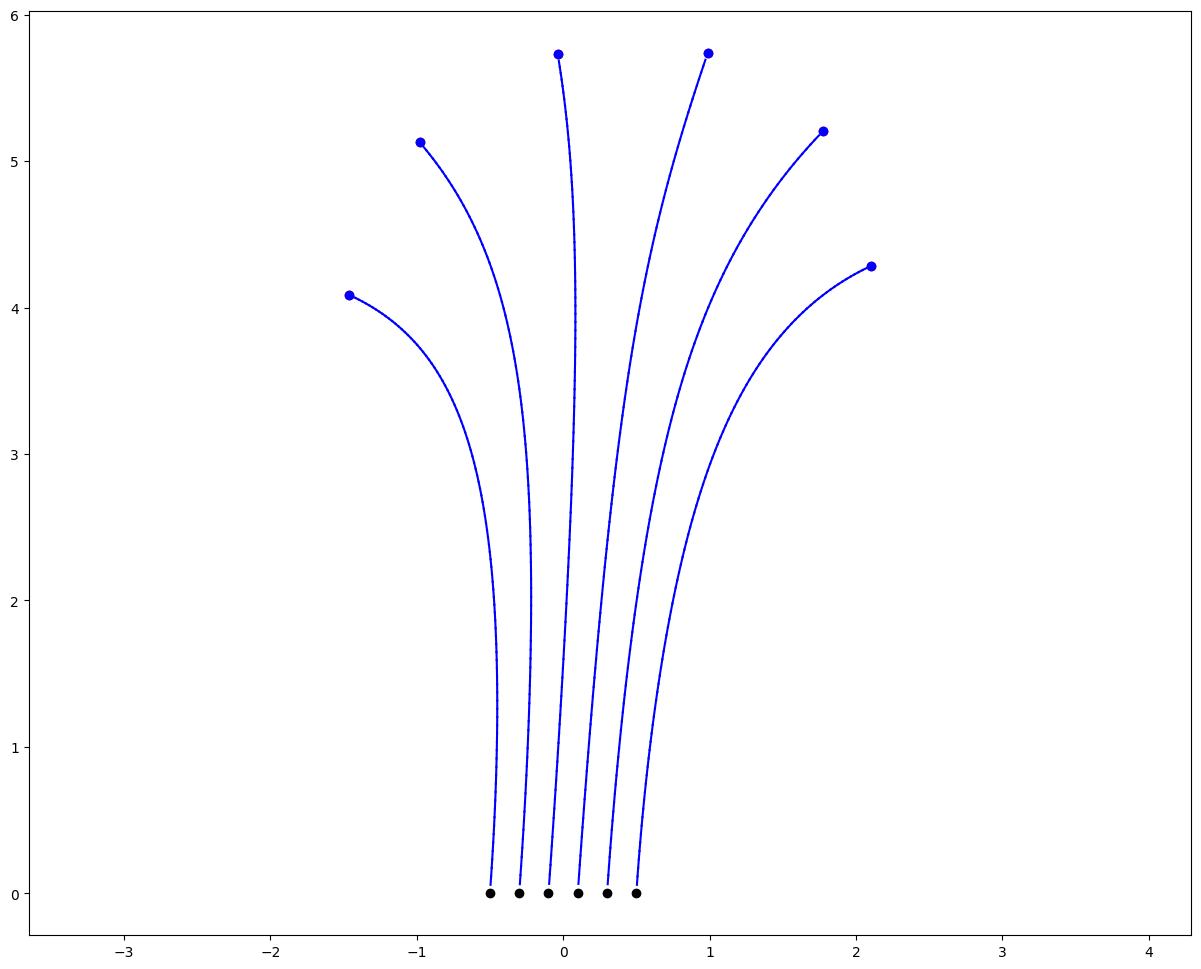

In [8]:
# Logarithm map
from jaxgeometry.Riemannian import Log
Log.initialize(M,f=M.Exp_Hamiltonian)

v = (qs[-1],charts[-1])
p_Log = M.Log(q,v)[0]
# p_Log = M.Log(q,q1)[0]
print(p_Log)
print(M.H(q,p))

(qs,charts) = M.Exp_Hamiltoniant(q,p_Log)
M.plot()
M.plotx(q,color='k')
M.plotx(v,color='r')
M.plot_path(zip(qs,charts),v,linewidth=1.5)
plt.show()

## visualization of the diffeomorphism solving boundary value problem

In [29]:
n_landmark = M.N
minx = np.min([np.reshape(q[0],(n_landmark,2))[:,0], np.reshape(v[0],(n_landmark,2))[:,0]]) - 1
miny = np.min([np.reshape(q[0],(n_landmark,2))[:,1], np.reshape(v[0],(n_landmark,2))[:,1]]) - 1
maxy = np.max([np.reshape(q[0],(n_landmark,2))[:,1], np.reshape(v[0],(n_landmark,2))[:,1]]) + 1
maxx = np.max([np.reshape(q[0],(n_landmark,2))[:,0], np.reshape(v[0],(n_landmark,2))[:,0]]) + 1

pts_v =100
pts_h =100
K = pts_h*pts_v # number of evaluation points
x,y = np.meshgrid(np.linspace(minx,maxx,pts_v),np.linspace(miny,maxy,pts_h))
x = x.flatten(); y = y.flatten()
xy = jnp.vstack((x,y)).T

# flow arbitrary points of the domain
def ode_Hamiltonian_advect(c,y):
    t,x,chart = c
    qp, = y
    q = qp[0]
    p = qp[1]

    # jax.debug.print("{x}", x=x.shape)
    # jax.debug.print("{q}", q=q.shape)
    # jax.debug.print("{MK}", MK=M.K(x,q).shape)

    dxt = jnp.tensordot(M.K(x,q),p,(1,0)).reshape((-1,M.m))
    return dxt

M.Hamiltonian_advect = lambda xs,qps,dts: integrate(ode_Hamiltonian_advect,
                                                    None,
                                                    xs[0].reshape((-1,M.m)),
                                                    xs[1],
                                                    dts,
                                                    qps[::1])

# landmark flow
n_steps = 100
_dts = dts(n_steps=n_steps)
(_,qps,charts_qp) = M.Hamiltonian_dynamics(q,p,_dts)

# grid/ambient flow
_,xs = M.Hamiltonian_advect((xy.flatten(),M.chart()),qps,_dts)

print(qps.shape, xs.shape)
qs = qps[:,0]
ms = qps[:,1]
#M.plot_path(zip(qs,charts),v,linewidth=1.5)

                                               

(100, 2, 12) (100, 10000, 2)


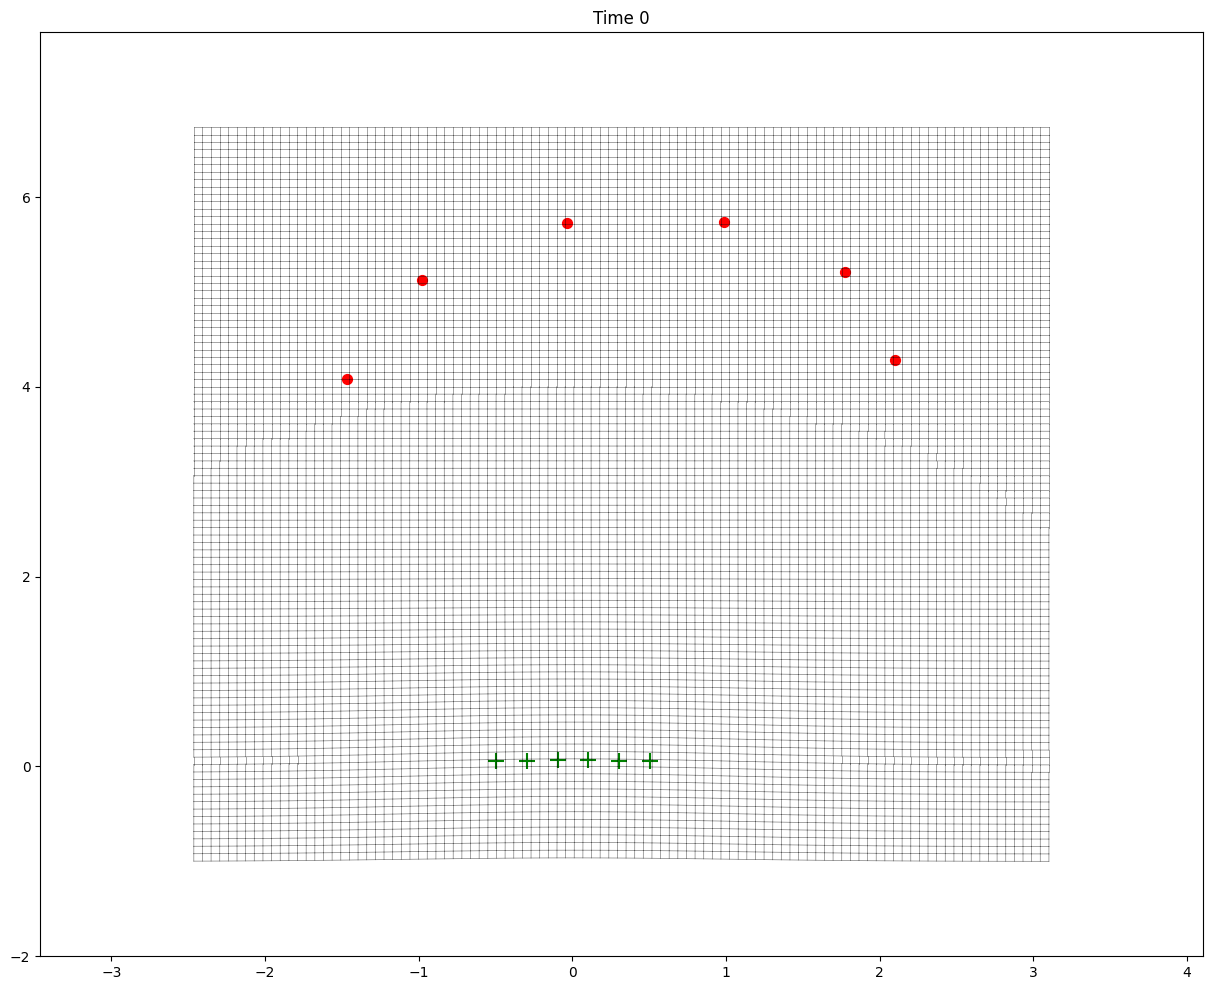

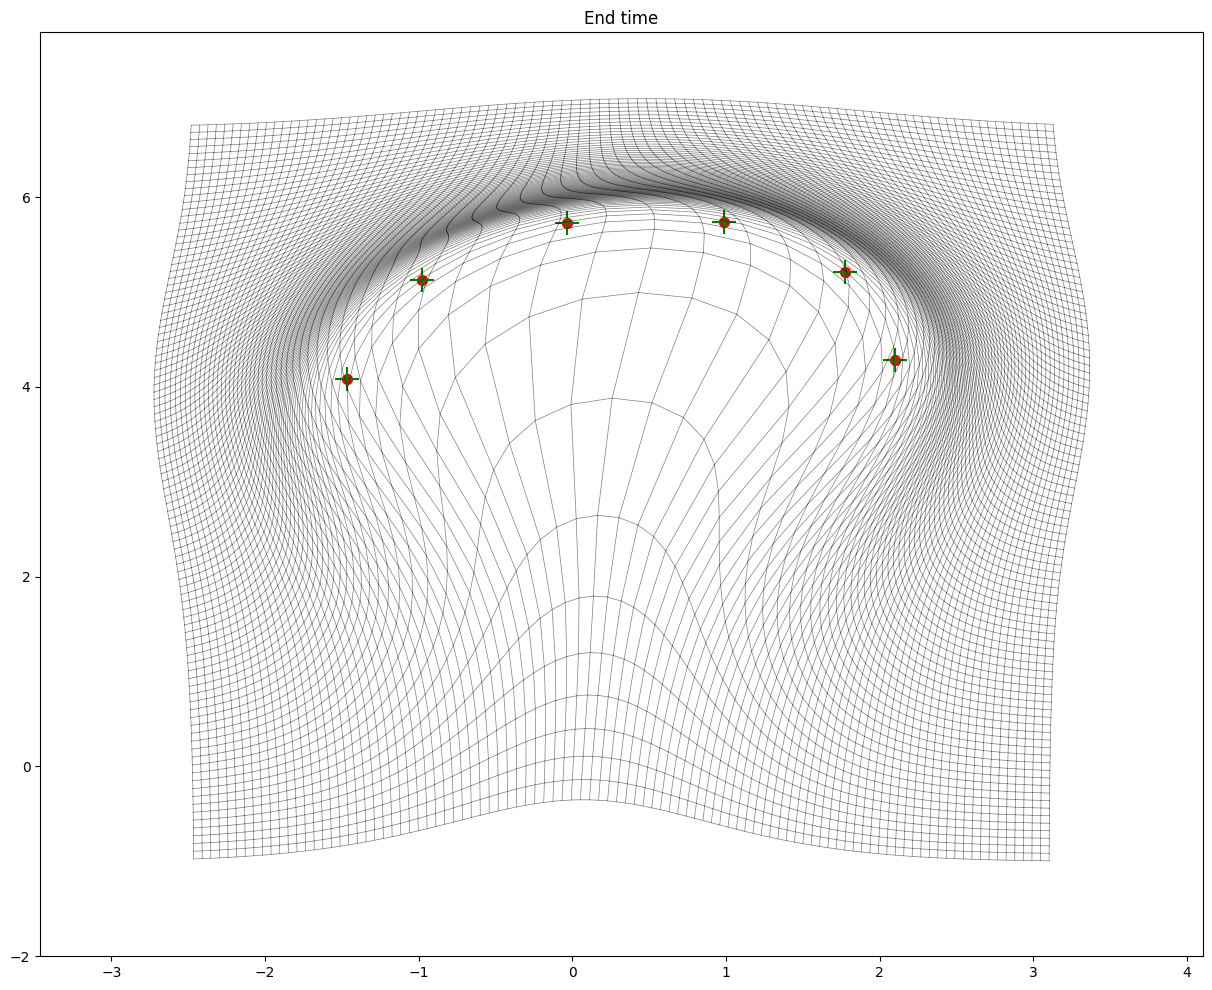

In [32]:
M.newfig()

q_0 = v[0].reshape(n_landmark,2)

#M.plot()
#M.plotx(v,color="r")
##plt.scatter(xs[-1,:][:,0],xs[-1,:][:,1],color='b')
#for i in range(0, K, pts_v):
#    plt.plot(xy[np.arange(i,(i+pts_v)),0],xy[np.arange(i,(i+pts_v)),1],
#             color="k", linewidth=0.5, alpha=0.5)
#for i in range(0,K,1):
#    plt.plot(xy[np.arange(i,K,pts_v),0],xy[np.arange(i,K,pts_v),1],
#             color="k", linewidth=0.5, alpha=0.5)
#plt.title("Target shape")
#plt.xlim([minx, maxx])
#plt.ylim([miny-0.2, maxy+0.2])
#plt.show()


diffeo_time_idx = 0
grid_time_idx = 0

M.plot()
#M.plotx(q,color="b")
#M.plotx(v,color="r")
# plt.scatter(q_0[:,0], q_0[:,1], marker='o', c = np.arange(k), cmap=cmap, s=50) # target shape
plt.scatter(q_0[:,0], q_0[:,1], marker='o', c = 'red', s=50) # target shape
# plt.scatter(np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,0],np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,1],
#             c = np.arange(k), cmap=cmap, marker='+', s=120)
plt.scatter(np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,0],np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,1],
            c = 'green', marker='+', s=120)
#plt.scatter(xs[-1,:][:,0],xs[-1,:][:,1],color='b')

for i in range(0, K, pts_v):  # dette loop forbinder punkter med streger horizontalt
    plt.plot(xs[grid_time_idx,:][np.arange(i,(i+pts_v)),0],xs[grid_time_idx,:][np.arange(i,(i+pts_v)),1],
             color="k",linewidth=0.5, alpha=0.5
             )

for i in range(0,K,1): # dette loop forbinder punkter med streger vertikalt
    idxs = [i + j*pts_v for j in [0,1] if i + j*pts_v < K]  # get index of current point and the point one row below
    plt.plot(xs[grid_time_idx,:][idxs,0],xs[grid_time_idx,:][idxs,1],
             color="k",linewidth=0.5, alpha=0.5)

plt.title("Time 0")
plt.axis('auto')
plt.xlim([minx-1, maxx+1])
plt.ylim([miny-1, maxy+1])
plt.show()

############

diffeo_time_idx = 100
grid_time_idx = 100

M.plot()
#M.plotx(q,color="b")
#M.plotx(v,color="r")
# plt.scatter(q_0[:,0], q_0[:,1], marker='o', c = np.arange(k), cmap=cmap, s=50) # target shape
# plt.scatter(np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,0],
#             np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,1],
#             c = np.arange(k), cmap=cmap, marker='+', s=300)
plt.scatter(q_0[:,0], q_0[:,1], marker='o', c = 'red', s=50) # target shape
plt.scatter(np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,0],
            np.reshape(qs[diffeo_time_idx,:],(n_landmark,2))[:,1],
            c = 'green', marker='+', s=300)
#plt.scatter(xs[-1,:][:,0],xs[-1,:][:,1],color='b')

for i in range(0, K, pts_v):  # dette loop forbinder punkter med streger horizontalt
    plt.plot(xs[grid_time_idx,:][np.arange(i,(i+pts_v)),0],
             xs[grid_time_idx,:][np.arange(i,(i+pts_v)),1],
             color="k",linewidth=0.5, alpha=0.5
             )

for i in range(0,K,1): # dette loop forbinder punkter med streger vertikalt
    idxs = [i + j*pts_v for j in [0,1] if i + j*pts_v < K]  # get index of current point and the point one row below
    plt.plot(xs[grid_time_idx,:][idxs,0],
             xs[grid_time_idx,:][idxs,1],
             color="k",linewidth=0.5, alpha=0.5)
plt.title("End time")

plt.axis('auto')
plt.xlim([minx-1, maxx+1])
plt.ylim([miny-1, maxy+1])
plt.show()




Animation of deformation, momentum and vector fields

In [34]:
### on a fixed grid

# create grid 
pts_v_spatial=20
pts_h_spatial=20
K_spatial = pts_h_spatial*pts_v_spatial # number of evaluation points
x_spatial,y_spatial = np.meshgrid(np.linspace(minx,maxx,pts_v_spatial),np.linspace(miny,maxy,pts_h_spatial))
x_spatial = x_spatial.flatten(); y_spatial = y_spatial.flatten()
xy_spatial = jnp.vstack((x_spatial,y_spatial)).T

def ode_Hamiltonian_advect_fixed_grid(c,y):
    t,x = c
    q = y[0]
    p = y[1]

    dxt = jnp.tensordot(M.K(x,q),p,(1,0)).reshape((-1,M.m))
    return dxt

def ode_Hamiltonian_advect_moving_grid(y):
    q = y[0]
    p = y[1]

    dxt = jnp.tensordot(M.K(q,q),p,(1,0)).reshape((-1,M.m))
    return dxt

t_tmp, x_tmp = None, xy_spatial
c_tmp = (t_tmp, x_tmp)

def func1(y):
    return ode_Hamiltonian_advect_fixed_grid(c_tmp, y)

def func2(y):
    return ode_Hamiltonian_advect_moving_grid(y)


vectorized_func1 = jax.vmap(func1)
vectorized_func2 = jax.vmap(func2)

ys_tmp = qps
spatial_velo_grid = vectorized_func1(ys_tmp)
spatial_velo_landmarks = vectorized_func2(ys_tmp)

In [53]:
from matplotlib.animation import FuncAnimation
from IPython import display

fig, ax = plt.subplots(figsize=(20, 20))

ax.set_aspect(0.9)

line, = ax.plot([],'*')

ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)


# shape and ambient grid
grid, = ax.plot([], [], '.', markersize=1)  # grid
points_deformed, = ax.plot([], [], '+', markersize=15, color='g')  # deformed shape points
points_target, = ax.plot([], [], 'o', markersize=10, color='r', alpha=1)  # target shape points

# momentum field
scatter_points = np.array([np.reshape(qs[0,:],(n_landmark,2))[:,0], 
                  np.reshape(qs[0,:],(n_landmark,2))[:,1]]).T

Q_momentum = ax.quiver(scatter_points[:, 0], scatter_points[:, 1], np.zeros_like(scatter_points[:, 0]), 
                      np.zeros_like(scatter_points[:, 1]), 
                      color='g', scale=2, scale_units='xy', angles='xy',
                      alpha=0.7, width=0.003, headwidth=3, headlength=4
                      )

momentum, = ax.plot([], [], '.', markersize=10, color='k', alpha=0.1)  # momentum along deformed shape 

# add spatial velocity field along a fixed grid
Q_spatial_grid = ax.quiver(xy_spatial[:,0], xy_spatial[:,1], spatial_velo_grid[0,:,0], spatial_velo_grid[0,:,1],
                           alpha=0.5, scale=10, scale_units='xy', angles='xy', width=0.003, headwidth=3, headlength=4,
                           color='k')
Q_spatial_landmarks = ax.quiver(qps[0,0,0::2], qps[0,0,1::2], spatial_velo_landmarks[0,:,0], spatial_velo_landmarks[0,:,1],
                           alpha=0.5, scale=2, scale_units='xy', angles='xy', width=0.003, headwidth=3, headlength=4,
                           color='b')

from matplotlib.lines import Line2D

# Create legend
legend_elements = [Line2D([0], [0], color='g', lw=2, label='Momentum field on landmarks'),
                   Line2D([0], [0], color='b', lw=2, label='Velocity field on landmarks'),
                   Line2D([0], [0], color='k', lw=2, label='Velocity field on grid')]

# Place legend on the axes
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)


ax.set_title('Flow of diffeomorphisms solving the boundary value problem', fontsize=30)

def animate(t):
    grid.set_data((xs[t,:,0],
                   xs[t,:,1]))
    
    scatter_points[:,0] = np.reshape(qs[t,:],(n_landmark,2))[:,0]
    scatter_points[:,1] = np.reshape(qs[t,:],(n_landmark,2))[:,1]

    points_deformed.set_data((scatter_points[:,0],
                              scatter_points[:,1]))
    points_target.set_data((q_0[:,0], q_0[:,1]))

    U_scatter = np.reshape(ms[t,:],(n_landmark,2))[:,0]
    V_scatter = np.reshape(ms[t,:],(n_landmark,2))[:,1]
    Q_momentum.set_offsets(scatter_points)
    Q_momentum.set_UVC(U_scatter, V_scatter)

    Q_spatial_grid.set_UVC(spatial_velo_grid[t,:,0], spatial_velo_grid[t,:,1])

    Q_spatial_landmarks.set_offsets(qps[t,0].reshape((-1,2)))
    Q_spatial_landmarks.set_UVC(spatial_velo_landmarks[t,:,0], spatial_velo_landmarks[t,:,1])
    

    return Q_momentum, grid, points_deformed, points_target, Q_spatial_grid, Q_spatial_landmarks  # add the new quiver plot to the return statement


anim = FuncAnimation(fig, animate, frames=n_steps, interval=100, blit=True)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Curvature

In [9]:
from jaxgeometry.Riemannian import curvature
curvature.initialize(M)
print("curvature shape= ", M.R(q).shape)
# print("curvature = ", M.Rf(q))
# Ricci and scalar curvature:
print("Ricci curvature = ", M.Ricci_curv(q))
print("Scalar curvature = ", M.S_curv(q))

curvature shape=  (12, 12, 12, 12)
Ricci curvature =  [[ 1.15901438e+12  0.00000000e+00 -5.36366966e+12  0.00000000e+00
   1.03254055e+13  0.00000000e+00 -1.03299395e+13  0.00000000e+00
   5.37395672e+12  0.00000000e+00 -1.16223626e+12  0.00000000e+00]
 [ 0.00000000e+00  3.28401709e+12  0.00000000e+00 -1.52696951e+13
   0.00000000e+00  2.95215143e+13  0.00000000e+00 -2.96692356e+13
   0.00000000e+00  1.54992304e+13  0.00000000e+00 -3.36727926e+12]
 [-5.36310763e+12  0.00000000e+00  2.48197394e+13  0.00000000e+00
  -4.77872909e+13  0.00000000e+00  4.78112068e+13  0.00000000e+00
  -2.48709435e+13  0.00000000e+00  5.38034412e+12  0.00000000e+00]
 [ 0.00000000e+00 -1.52691540e+13  0.00000000e+00  7.09963547e+13
   0.00000000e+00 -1.37263078e+14  0.00000000e+00  1.37952143e+14
   0.00000000e+00 -7.20660028e+13  0.00000000e+00  1.56567161e+13]
 [ 1.03256802e+13  0.00000000e+00 -4.77894300e+13  0.00000000e+00
   9.20010348e+13  0.00000000e+00 -9.20438335e+13  0.00000000e+00
   4.78850434e+13 

In [10]:
# plot min of Ricci curvature tensor between two landmarks, one fixed at x1=(0,0)
if M.N == 2:
    x1 = jnp.array([0.,0.])

    # grids
    pts = 40 # even number to avoid (0,0), high value implies nicer plot but extended computation time
    border = .2
    minx = -border
    maxx = +border
    miny = -border
    maxy = +border
    X, Y = np.meshgrid(np.linspace(minx,maxx,pts),np.linspace(miny,maxy,pts))
    xy = np.vstack([X.ravel(), Y.ravel()]).T        

    # plot
    newfig()
    cmap = cm.jet
    alpha = 1
    ax = plt.gca()
    fs = np.array([np.min(np.real(np.linalg.eigvals(
        np.dot(M.gsharp(M.coords(np.concatenate((x1,x)))),
               M.Ricci_curv(M.coords(np.concatenate((x1,x))))
              )))) for x in xy])
    norm = mpl.colors.Normalize(vmin=np.min(fs),vmax=np.max(fs))
    colors = cmap(norm(fs)).reshape(X.shape+(4,))
    surf = ax.plot_surface(X, Y, fs.reshape(X.shape), rstride=1, cstride=1, cmap=cmap, facecolors = colors,  linewidth=0., antialiased=True, alpha=alpha, edgecolor=(0,0,0,0), shade=False)
    m = cm.ScalarMappable(cmap=surf.cmap,norm=norm)
    m.set_array(colors)
    plt.colorbar(m,ax=ax,shrink=0.7)
    ax.set_xlim3d(minx,maxx), ax.set_ylim3d(miny,maxy), ax.set_zlim3d(np.min(fs)-1,np.max(fs)+1)

## Brownian Motion

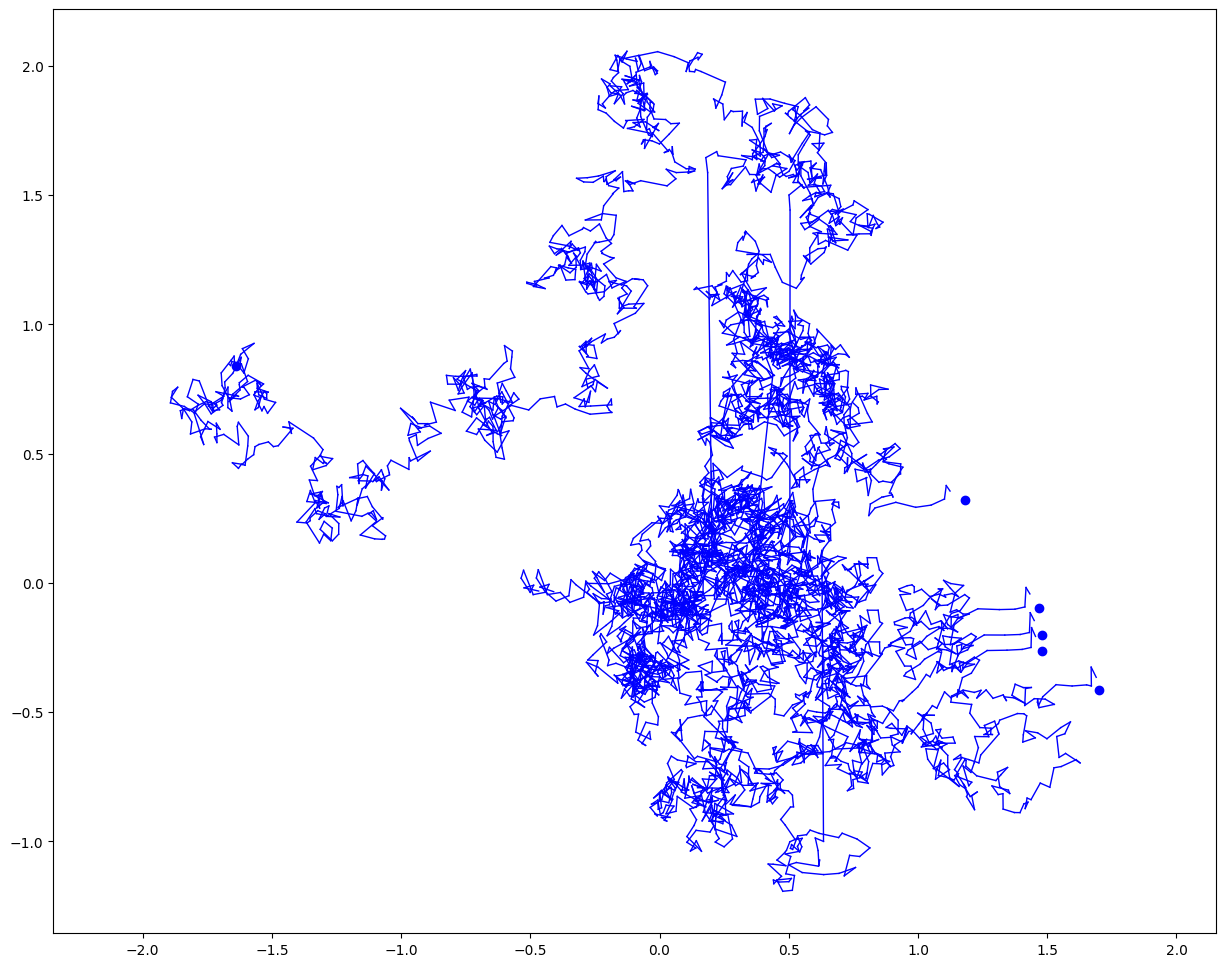

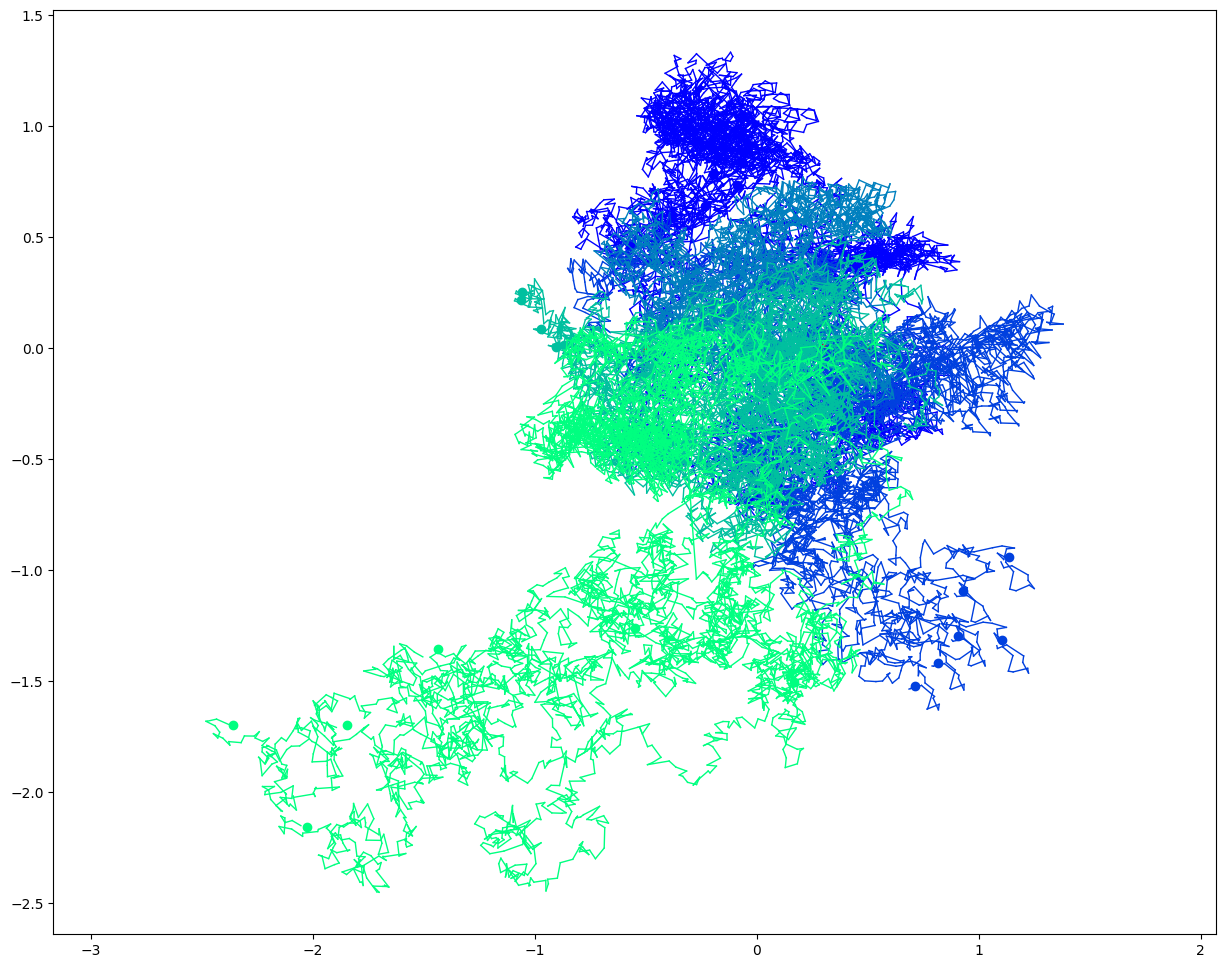

In [11]:
# coordinate form
from jaxgeometry.stochastics import Brownian_coords
Brownian_coords.initialize(M)

_dts = dts(n_steps=1000)
(ts,xs,charts) = M.Brownian_coords(q,_dts,dWs(M.dim,_dts))

# plot
M.newfig()
M.plot()
M.plot_path(zip(xs,charts))
plt.show()

# plot multiple sample paths
N = 5
xss = np.zeros((N,xs.shape[0],M.dim))
chartss = np.zeros((N,xs.shape[0],q[1].shape[0]))
for i in range(N):
    (ts,xs,charts) = M.Brownian_coords(q,_dts,dWs(M.dim,_dts))
    xss[i] = xs
    chartss[i] = charts

# plot
M.newfig()
M.plot()
colormap = plt.get_cmap('winter')
colors=[colormap(k) for k in np.linspace(0, 1, N)]
for i in range(N):
    M.plot_path(zip(xss[i],chartss[i]),color=colors[i])
M.plotx(q,color='r')
plt.show()

## Bridge sampling

log likelihood:  -42840230.0 , log varphi:  4.296931


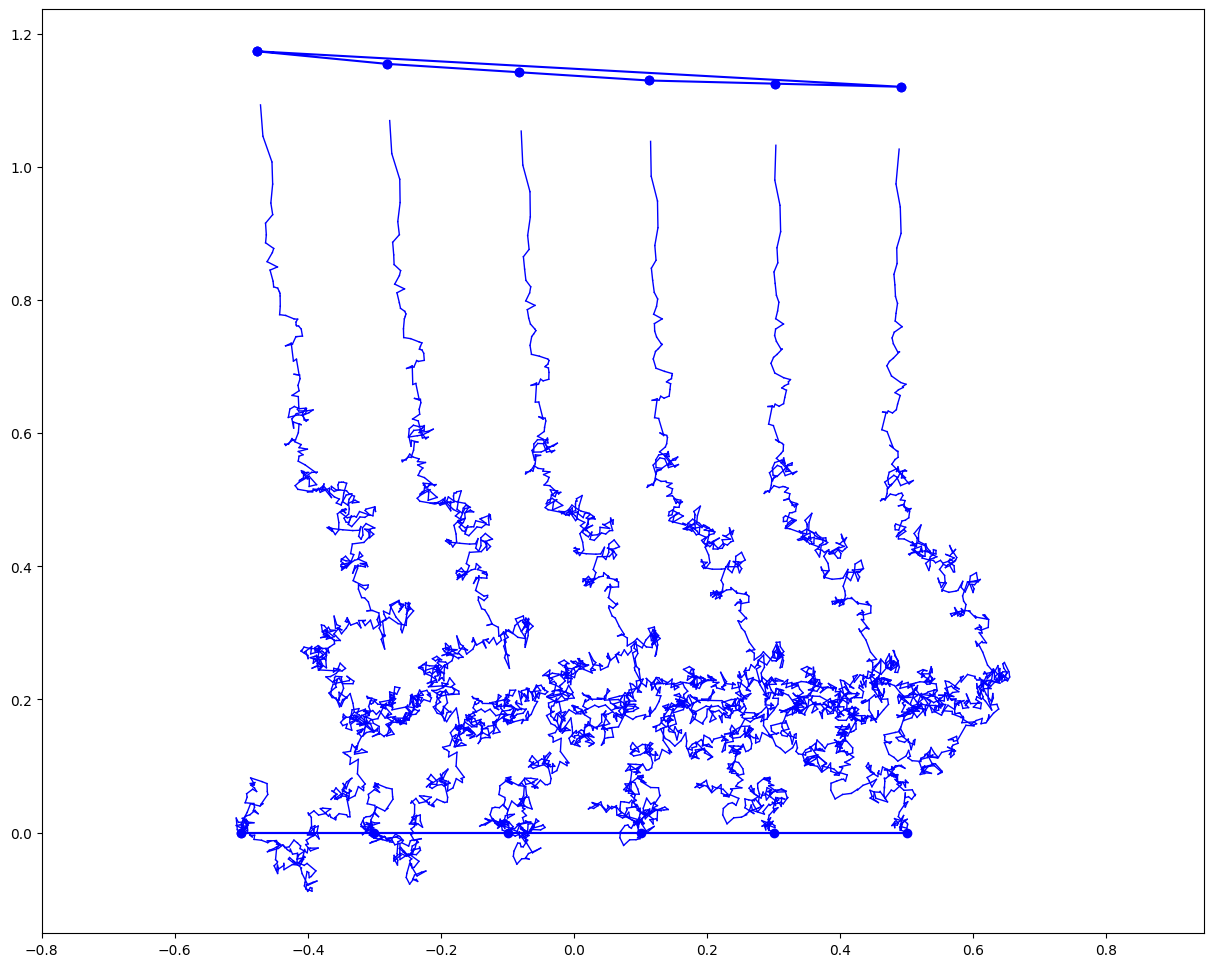

In [12]:
# Delyon/Hu guided process
from jaxgeometry.stochastics.guided_process import *

# guide function
phi = lambda q,v,_: jnp.tensordot(jnp.linalg.inv(jnp.linalg.cholesky(M.gsharp(q))),-(q[0]-v).flatten(),(1,0))

(Brownian_coords_guided,sde_Brownian_coords_guided,*_) = get_guided(
    M,M.sde_Brownian_coords,M.chart_update_Brownian_coords,phi)

# note that the noise is scaled by .2 (i.e. .2*dWs)
(ts,qs,charts,log_likelihood,log_varphi) = Brownian_coords_guided(q,(np.tile(np.array([0.,1.5]),(M.N,1)).flatten()+q[0],q[1]),
                                                                  _dts,dWs(M.dim,_dts),.2)
print("log likelihood: ", log_likelihood[-1], ", log varphi: ", log_varphi[-1])

# Visualize bridge
M.plot()
M.plot_path((q,)+tuple(zip(qs,charts)),curve=True) # no translation added
# plt.savefig('bridge.pdf')

# Vector and covector transport

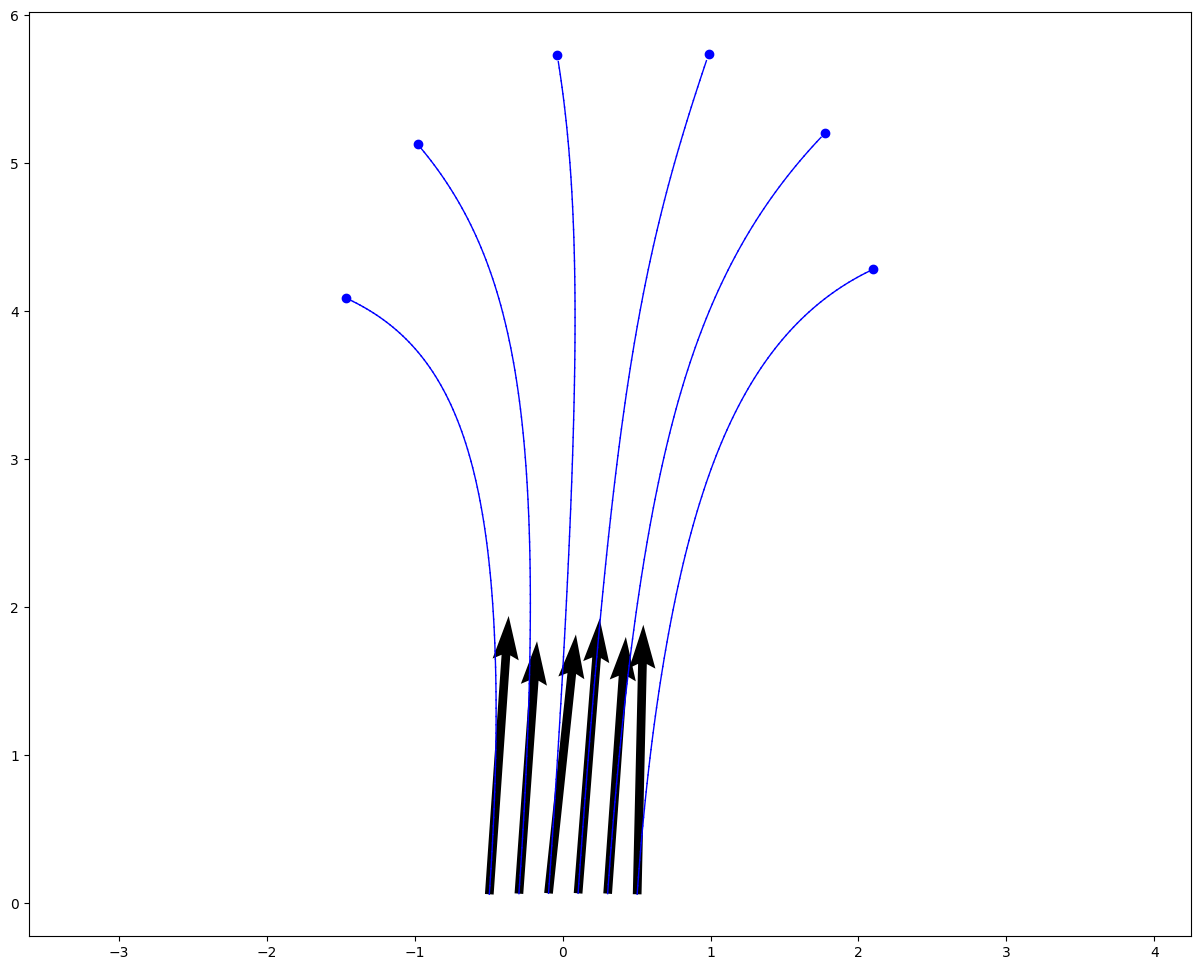

[[0.41889465 5.7806654 ]
 [0.44538158 6.204953  ]
 [0.45648593 6.428108  ]
 [0.45102438 6.4271975 ]
 [0.42959136 6.202299  ]
 [0.39445257 5.776497  ]] [[0.67321765 8.706394  ]
 [0.9344488  6.7130632 ]
 [0.77946496 5.322724  ]
 [0.5130294  5.0100064 ]
 [0.45976728 5.669591  ]
 [0.7667807  6.867937  ]]
[[0.41889456 5.7806654 ]
 [0.44538155 6.2049537 ]
 [0.45648593 6.4281087 ]
 [0.45102438 6.427197  ]
 [0.42959136 6.2022986 ]
 [0.39445284 5.776497  ]] [[0.67321765 8.706394  ]
 [0.9344488  6.7130632 ]
 [0.77946496 5.322724  ]
 [0.5130294  5.0100064 ]
 [0.45976728 5.669591  ]
 [0.7667807  6.867937  ]]
[[0.08333395 1.1971226 ]
 [0.07786647 1.0855858 ]
 [0.11788593 1.1133097 ]
 [0.09271417 1.1813618 ]
 [0.07832593 1.1042205 ]
 [0.02653776 1.1593039 ]] [[ 2.3963752   1.6390663 ]
 [ 1.4765933   1.080221  ]
 [ 0.6501999   0.8899852 ]
 [-0.36048713  0.9535702 ]
 [-1.1662534   1.095965  ]
 [-1.9248447   1.5133107 ]]
[[0.08333388 1.1971226 ]
 [0.07786633 1.085586  ]
 [0.1178859  1.1133097 ]
 [0.092

In [13]:
# differential transport
from jaxgeometry.dynamics import flow_differential
flow_differential.initialize(M)

# covector path, need both position and momentum
(ts,qps,_) = M.Hamiltonian_dynamics(q,p,dts())
qs = qps[:,0,:]
ps = qps[:,1,:]

# plot
M.plot()
M.plot_path(zip(qs,charts),p)
plt.show()

# compute differential transport
_,dphis,_ = M.flow_differential(qps,dts())

# map vector from t=0. to t=.5
v_t0 = M.sharp(q,p).reshape((M.N,M.m)) # velocity at t=0 as an example, could be other vectors
dphi_t12 = dphis[dts().size//2]
v_t12 = jax.vmap(lambda A,v: jnp.dot(A,v))(dphi_t12,v_t0)
print(v_t0,v_t12)

# map vector from t=.5 to t=0
dphi_t12 = dphis[dts().size//2]
v_t0 = jax.vmap(lambda A,v: jnp.linalg.solve(A,v))(dphi_t12,v_t12)
print(v_t0,v_t12)

# map covector from t=0. to t=.5
eta_t0 = p.reshape((M.N,M.m)) # momentum at t=0 as an example, could be other covectors
dphi_t12 = dphis[dts().size//2]
eta_t12 = jax.vmap(lambda A,v: jnp.dot(A.T,v))(dphi_t12,eta_t0)
print(eta_t0,eta_t12)

# map covector from t=.5 to t=0
dphi_t12 = dphis[dts().size//2]
eta_t0 = jax.vmap(lambda A,v: jnp.linalg.solve(A.T,v))(dphi_t12,eta_t12)
print(eta_t0,eta_t12)